In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Данные из задачи
data = {
    "xi": np.arange(1, 21),
    "yi": [23, 24, 25, 28, 33, 41, 54, 56, 58, 56, 52, 67, 66, 70, 71, 56, 53, 46, 60, 65]
}

df = pd.DataFrame(data)

print(df)

# Построение модели линейной регрессии
X = sm.add_constant(df['xi'])  # добавляем константу для учета свободного члена в уравнении
y = df['yi']

# Оценка модели
model = sm.OLS(y, X).fit()

# Получение результатов
coefficients = model.params
p_values = model.pvalues
r_squared = model.rsquared

coefficients, p_values, r_squared

    xi  yi
0    1  23
1    2  24
2    3  25
3    4  28
4    5  33
5    6  41
6    7  54
7    8  56
8    9  58
9   10  56
10  11  52
11  12  67
12  13  66
13  14  70
14  15  71
15  16  56
16  17  53
17  18  46
18  19  60
19  20  65


(const    28.426316
 xi        2.073684
 dtype: float64,
 const    0.000015
 xi       0.000069
 dtype: float64,
 0.59436534052124)

На основе данных было построено выборочное уравнение линейной регрессии следующего вида: y\=28.426+2.074x

Где:

*   Свободный член (константа) равен примерно 28.426.
*   Коэффициент при переменной xxx (время) равен примерно 2.074.

Оценка значимости коэффициентов и уравнения регрессии в целом показывает следующее:

*   P-значение для константы: приблизительно 0.000015.
*   P-значение для коэффициента при xxx: приблизительно 0.000069.

Оба P-значения значительно ниже 0.05, что указывает на статистическую значимость как свободного члена, так и коэффициента при переменной x.

Коэффициент детерминации (R-квадрат) равен примерно 0.594, что указывает на то, что примерно 59.4% вариации зависимой переменной y объясняется моделью линейной регрессии на основе независимой переменной x

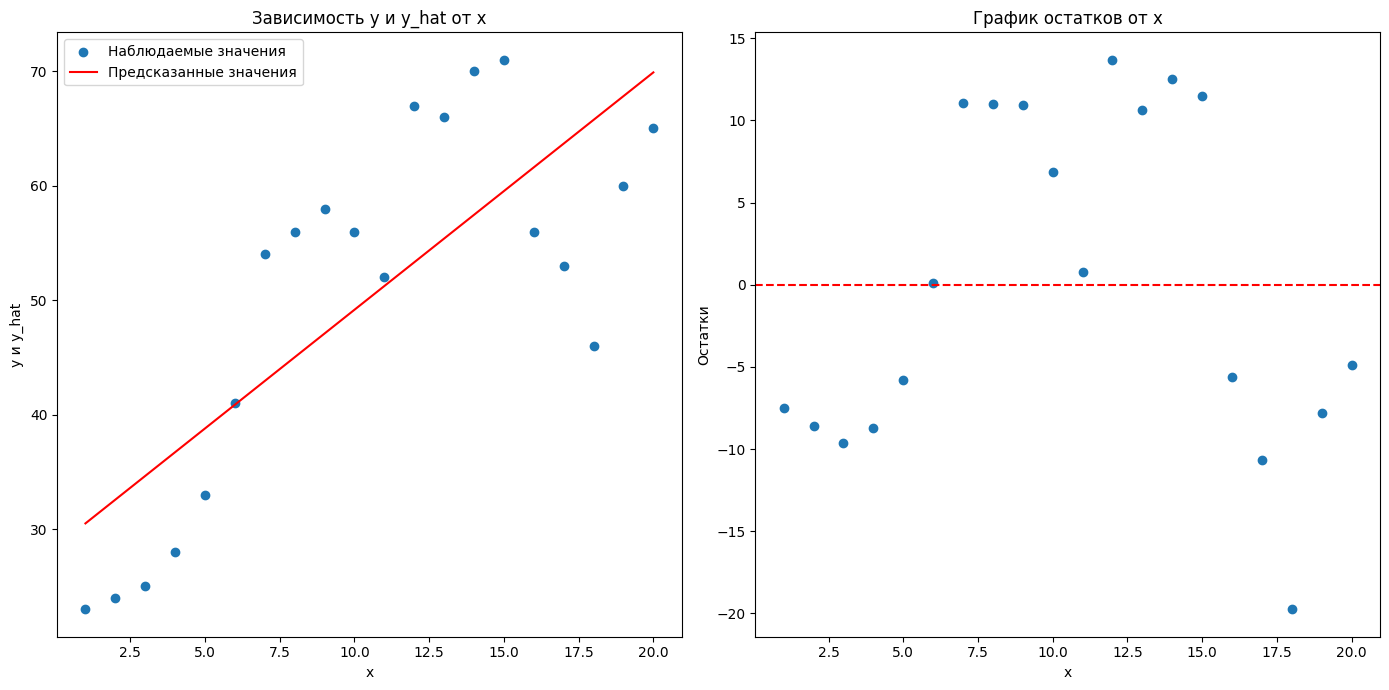

0.48755831953441453

In [ ]:
import matplotlib.pyplot as plt

# Расчет предсказанных значений и остатков
df['y_hat'] = model.predict(X)
df['residuals'] = model.resid

# График зависимости y и y_hat от x
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(df['xi'], df['yi'], label='Наблюдаемые значения')
plt.plot(df['xi'], df['y_hat'], color='red', label='Предсказанные значения')
plt.title('Зависимость y и y_hat от x')
plt.xlabel('x')
plt.ylabel('y и y_hat')
plt.legend()

# График остатков от x
plt.subplot(1, 2, 2)
plt.scatter(df['xi'], df['residuals'])
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График остатков от x')
plt.xlabel('x')
plt.ylabel('Остатки')
plt.tight_layout()

plt.show()

# Расчет и вывод статистики Дарбина-Уотсона
dw_stat = sm.stats.stattools.durbin_watson(df['residuals'])
dw_stat



Как видно из графика остатков, они не распределены случайно вокруг линии , что может указывать на наличие автокорреляции.

Статистика Дарбина-Уотсона для этой модели составляет примерно 0.488. Это значение близко к 0, что указывает на положительную автокорреляцию остатков. В идеальном случае, если остатки не коррелированы, значение статистики Дарбина-Уотсона должно быть около 2. При уровне значимости  α\=0.05 и значении статистики намного меньше 2, мы можем заключить, что есть значимые основания полагать наличие автокорреляции в остатках.

In [ ]:
def cochrane_orcutt(df, y_col, x_col, iterations=6):
    y = df[y_col]
    X = sm.add_constant(df[x_col])
    model = sm.OLS(y, X).fit()
    residuals = model.resid

    for _ in range(iterations):
        # Создаем лаговую переменную для остатков
        df['residuals_lagged'] = residuals.shift()
        df = df.dropna()  # Удаляем строки с NA, возникающие из-за сдвига

        # Регрессия остатков на их лаговые значения
        rho_model = sm.OLS(df['residuals'][1:], sm.add_constant(df['residuals_lagged'][1:])).fit()
        rho = rho_model.params[1]

        # Преобразование переменных
        df['y_transformed'] = df[y_col] - rho * df[y_col].shift()
        df['x_transformed'] = df[x_col] - rho * df[x_col].shift()
        df = df.dropna()  # Удаляем строки с NA, возникающие из-за сдвига

        # Повторная оценка модели с преобразованными данными
        Y_transformed = df['y_transformed']
        X_transformed = sm.add_constant(df['x_transformed'])
        model = sm.OLS(Y_transformed, X_transformed).fit()
        residuals = model.resid

    return model, rho

# Выполнение процедуры Кохрейна-Оркатта
co_model, rho_estimate = cochrane_orcutt(df, 'yi', 'xi')

# Результаты после шести итераций
co_params = co_model.params
co_pvalues = co_model.pvalues
co_r_squared = co_model.rsquared

co_params, co_pvalues, co_r_squared, rho_estimate

<ipython-input-3-3880dad720ec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_transformed'] = df[y_col] - rho * df[y_col].shift()
<ipython-input-3-3880dad720ec>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_transformed'] = df[x_col] - rho * df[x_col].shift()


(const           -1.877412
 x_transformed    3.286510
 dtype: float64,
 const            0.949833
 x_transformed    0.698106
 dtype: float64,
 0.02687067510900032,
 0.8370893816624368)

После выполнения шести итераций процедуры Кохрейна-Оркатта мы получили следующие результаты:

*   Оценка коэффициента автокорреляции (ρ) равна приблизительно 0.837.
*   Параметры преобразованного уравнения регрессии следующие:
    *   Свободный член (константа): примерно -1.877.
    *   Коэффициент при преобразованном xxx: примерно 3.287.

P-значения для этих параметров:

*   Для константы: 0.950 (не статистически значимо при α\=0.05).
*   Для коэффициента при преобразованном xxx: 0.698 (также не статистически значимо при α\=0.05).

Коэффициент детерминации (R-квадрат) составляет приблизительно 0.027, что указывает на очень низкую объясняющую способность модели после коррекции автокорреляции.

Низкие значения R-квадрата и незначимые p-значения могут указывать на то, что применение процедуры Кохрейна-Оркатта не привело к значимому улучшению модели. Это может быть связано с небольшим объемом данных или особенностями самой временной последовательности данных, которые не лучшим образом соответствуют предположениям линейной регрессии с автокорреляцией остатков.